In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [15]:
df=pd.read_csv('1.02.+Multiple+linear+regression.csv')
df

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [16]:
df.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [17]:
y=df['GPA']
x1=df[['SAT','Rand 1,2,3']]

In [42]:
x1

,SAT,"Rand 1,2,3"
0,1714,1
1,1664,3
2,1760,3
3,1685,3
4,1693,2
...,...,...
79,1936,3
80,1810,1
81,1987,3
82,1962,1


In [18]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           6.58e-10
Time:                        21:36:08   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
x

,const,SAT,"Rand 1,2,3"
0,1.0,1714,1
1,1.0,1664,3
2,1.0,1760,3
3,1.0,1685,3
4,1.0,1693,2
...,...,...,...
79,1.0,1936,3
80,1.0,1810,1
81,1.0,1987,3
82,1.0,1962,1


In [19]:
reg=LinearRegression()
reg.fit(x1,y)

LinearRegression()

In [20]:
r2=reg.score(x1,y)

n=x.shape[0]
p=x.shape[1]

adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.3844317401044818

In [21]:
r2

0.4066811952814282

In [22]:
reg.intercept_

0.29603261264909486

In [23]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [24]:
reg.predict([[1760,2]])

C:\Users\kalok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.18972654])

(2.0, 3.9869388427460195)

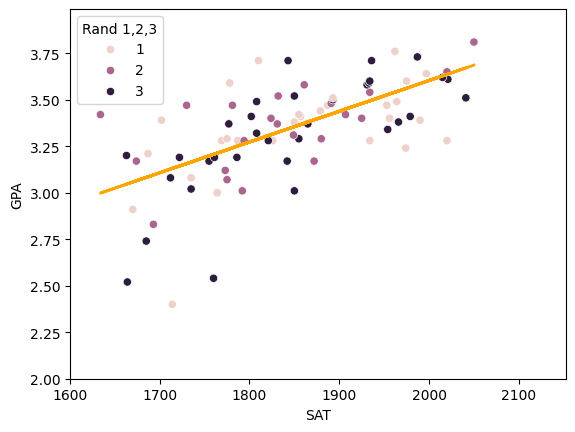

In [61]:
sns.scatterplot(data=df,x='SAT',y='GPA',hue='Rand 1,2,3')
yhat=reg.intercept_+reg.coef_*x1
plt.plot(x1,yhat,color='orange',lw=2)
plt.xlim(1600)
plt.ylim(2.0)

(array([1600., 1700., 1800., 1900., 2000., 2100., 2200.]),
 [Text(1600.0, 0, '1600'),
  Text(1700.0, 0, '1700'),
  Text(1800.0, 0, '1800'),
  Text(1900.0, 0, '1900'),
  Text(2000.0, 0, '2000'),
  Text(2100.0, 0, '2100'),
  Text(2200.0, 0, '2200')])

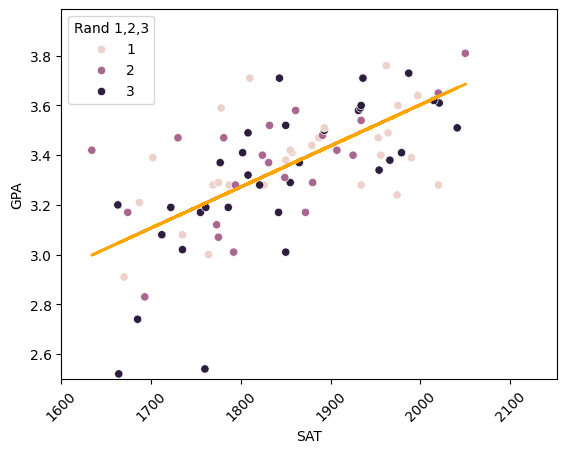

In [62]:
sns.scatterplot(data=df,x='SAT',y='GPA',hue='Rand 1,2,3')
yhat=reg.intercept_+reg.coef_*x1
plt.plot(x1,yhat,color='orange',lw=2)
plt.xlim(1600)
plt.ylim(2.5)
plt.xticks(rotation=45)